# DIABETES PREDICITON

IMPORTING ALL REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix
import os
import warnings
warnings.filterwarnings("ignore")

LOADING THE DATA

In [2]:
data=pd.read_csv("C:/Users/avk/Desktop/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# DATA CLEANING

 - handling missing data

In [3]:
data=data.drop_duplicates()

In [4]:
data = data.dropna(axis=0)

Printing the head of the data

In [5]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Printing the tail of the data

In [6]:
data.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Print the info of the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


Print the datatype of the data

In [8]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Checking for the null values

In [9]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

# Data splitting

In [11]:
from sklearn.model_selection import train_test_split
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,stratify=data['Outcome'])

In [12]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
692,2,121,70,32,95,39.1,0.886,23
440,0,189,104,25,0,34.3,0.435,41
9,8,125,96,0,0,0.0,0.232,54
518,13,76,60,0,0,32.8,0.180,41
267,2,128,64,42,0,40.0,1.101,24
...,...,...,...,...,...,...,...,...
332,1,180,0,0,0,43.3,0.282,41
665,1,112,80,45,132,34.8,0.217,24
538,0,127,80,37,210,36.3,0.804,23
497,2,81,72,15,76,30.1,0.547,25


In [13]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
350,4,92,80,0,0,42.2,0.237,29
561,0,198,66,32,274,41.3,0.502,28
290,0,78,88,29,40,36.9,0.434,21
752,3,108,62,24,0,26.0,0.223,25
477,7,114,76,17,110,23.8,0.466,31
...,...,...,...,...,...,...,...,...
721,1,114,66,36,200,38.1,0.289,21
490,2,83,65,28,66,36.8,0.629,24
90,1,80,55,0,0,19.1,0.258,21
659,3,80,82,31,70,34.2,1.292,27


In [14]:
y_train

692    0
440    1
9      1
518    0
267    0
      ..
332    1
665    0
538    0
497    0
185    1
Name: Outcome, Length: 576, dtype: int64

In [15]:
y_test

350    0
561    1
290    0
752    0
477    0
      ..
721    0
490    0
90     0
659    1
398    0
Name: Outcome, Length: 192, dtype: int64

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


# ACCURACY METRICS

In [17]:
def content(name,y_test,pred):
    print("*************",name,"*************")
    import seaborn as sns
    sns.heatmap(confusion_matrix(y_test,pred)%100, annot=True, cmap="YlGn")
    plt.xlabel("PREDICTED")
    plt.ylabel("ACTUAL")
    plt.figure(figsize=(6,6))
    plt.show()
    
    conf_mat = confusion_matrix(y_test,pred)%100
    tn = conf_mat[0][0]
    fp = conf_mat[0][1]
    fn = conf_mat[1][0]
    tp = conf_mat[1][1]
    
    print("****** ACCURACY METRICS ******")
    acc = (tp+tn)/(tp+tn+fp+fn)*100
    print("ACCURACY IS ",acc)
    sen = (tp)/(tp+fn)*100
    print("SENSITIVITY IS ",sen)
    spe = (tn)/(tn+fp)*100
    print("SPECIFICITY IS ",spe)

## 1)Naive Bayes Classifier

************* NAIVE BAYES *************


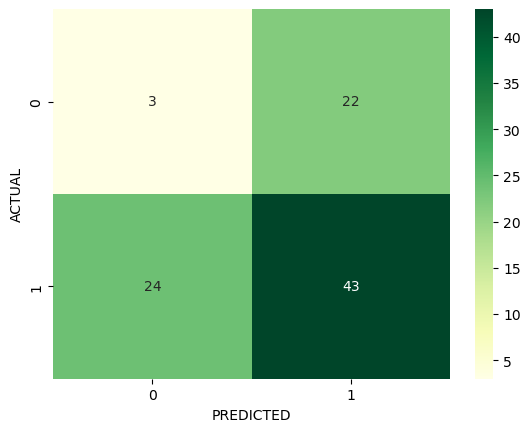

<Figure size 600x600 with 0 Axes>

****** ACCURACY METRICS ******
ACCURACY IS  50.0
SENSITIVITY IS  64.17910447761194
SPECIFICITY IS  12.0


In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred_gnb=gnb.predict(x_test)
content("NAIVE BAYES",y_test, pred_gnb)

## 2) Decision Tree Classifier

************* DECISION TREE CLASSIFIER *************


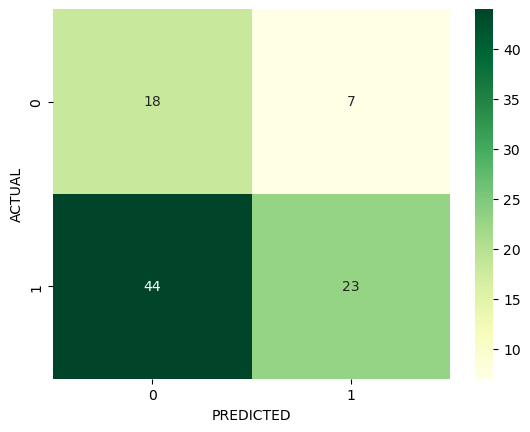

<Figure size 600x600 with 0 Axes>

****** ACCURACY METRICS ******
ACCURACY IS  44.565217391304344
SENSITIVITY IS  34.32835820895522
SPECIFICITY IS  72.0


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree.fit(x_train, y_train)
pred_decision_tree=decision_tree.predict(x_test)
content("DECISION TREE CLASSIFIER",y_test, pred_decision_tree)

## 3) Support Vector Machine Classifier

************* SUPPORT VECTOR MACHINE *************


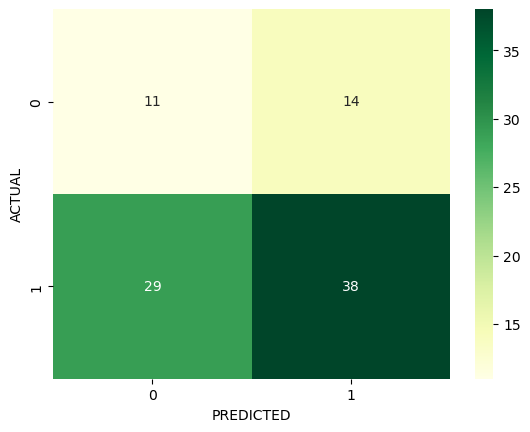

<Figure size 600x600 with 0 Axes>

****** ACCURACY METRICS ******
ACCURACY IS  53.2608695652174
SENSITIVITY IS  56.71641791044776
SPECIFICITY IS  44.0


In [20]:
from sklearn.svm import SVC
s=SVC(kernel='linear',random_state=42)
s.fit(x_train,y_train)
pred=s.predict(x_test)
content("SUPPORT VECTOR MACHINE",y_test,pred)

## 4) K-Nearest Neighbors Classifier

************* KNN ALGORITHM *************


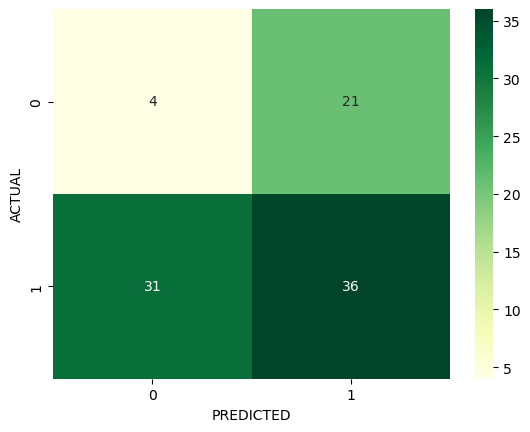

<Figure size 600x600 with 0 Axes>

****** ACCURACY METRICS ******
ACCURACY IS  43.47826086956522
SENSITIVITY IS  53.73134328358209
SPECIFICITY IS  16.0


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
content("KNN ALGORITHM",y_test,y_pred)